In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
dataframe1=pd.read_csv("/Users/karlosfernando/Downloads/fct_invoice.csv")
dataframe1

,invoice_no,customer_id,Unnamed: 2,quantity,price,payment_method,invoice_date,shopping_mall,Unnamed: 8,category,Unnamed: 10,product_price
0,I138884,229,NaN,5,1500.40,Credit Card,5/8/22,Kanyon,NaN,Clothing,NaN,7502.0
1,I317333,3433,NaN,3,1800.51,Debit Card,12/12/21,Forum Istanbul,NaN,Shoes,NaN,NaN
2,I127801,644,NaN,1,300.08,Cash,9/11/21,Metrocity,NaN,Clothing,NaN,NaN
3,I173702,4900,NaN,5,3000.85,Credit Card,16/05/2021,Metropol AVM,NaN,Shoes,NaN,NaN
4,I337046,1089,NaN,4,60.60,Cash,24/10/2021,Kanyon,NaN,Books,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,NaN,5,58.65,Credit Card,21/09/2022,Kanyon,NaN,Souvenir,NaN,NaN
99453,I325143,172,NaN,2,10.46,Cash,22/09/2021,Forum Istanbul,NaN,Food & Beverage,NaN,NaN
99454,I824010,425,NaN,2,10.46,Debit Card,28/03/2021,Metrocity,NaN,Food & Beverage,NaN,NaN
99455,I702964,577,NaN,4,4200.00,Cash,16/03/2021,Istinye Park,NaN,Technology,NaN,NaN


In [8]:
dataframe2=pd.read_json("/Users/karlosfernando/Downloads/dim_customer.json")
dataframe2

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [38]:
# Easy
# How many unique customers are in the dataset?
unique_customers= dataframe1.customer_id.nunique(dropna=True)
print("The number of unique customers are " + str(unique_customers))

The number of unique customers are 5191


In [42]:
# Easy
# What are the different categories of products available? How many unique categories are there?
categories = dataframe1.category.unique()
number_categories= len(categories)
print("The different categories of products available are " + str(categories) + ". The number of unique categories are " + str(number_categories) + ".")

The different categories of products available are ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']. The number of unique categories are 8.


In [45]:
# Easy
# Which payment method is the most popular? How many times was it used?

payment_method = dataframe1.groupby("payment_method")["payment_method"].count()
method = payment_method.idxmax()
counts = payment_method.max()


print("The most popular payment method is " + str(method) + ". It was used " + str(counts) + " times.")

The most popular payment method is Cash. It was used 44447 times.


In [19]:
# Medium 1
# What are the three most popular categories, by total sales?

dataframe1["sales"]= dataframe1["quantity"] * dataframe1["price"]
category_sales = dataframe1.groupby('category')['sales'].sum().nlargest(3)

top_categories = list(category_sales.index)
top_category_sales = list(category_sales)

print(f"The top 3 popular categories are {top_categories}.")
print(f"Their total sales respectively are {top_category_sales}.")

The top 3 popular categories are ['Clothing', 'Shoes', 'Technology'].
Their total sales respectively are [113996791.03999999, 66553451.47, 57862350.0].


In [33]:
# Medium 2
# What are the total sales attributed to customers over the age of 45?

merged_df = pd.merge(dataframe2, dataframe1, left_on="id", right_on="customer_id")

over_45_df = merged_df[merged_df['age'] > 45]

total_sales_over_45 = over_45_df['sales'].sum()

print(f"The total sales attributed to customers over the age of 45 is: {total_sales_over_45}")

The total sales attributed to customers over the age of 45 is: 82039768.14999999


In [69]:
over_45_df

,age,first_name,gender,id,last_name,invoice_no,customer_id,Unnamed: 2,quantity,price,payment_method,invoice_date,shopping_mall,Unnamed: 8,category,Unnamed: 10,product_price,sales
0,48.0,Nicholas,M,0,Flores,I254078,0,NaN,3,1800.51,Cash,28/05/2021,Kanyon,NaN,Shoes,NaN,NaN,5401.53
1,48.0,Nicholas,M,0,Flores,I387354,0,NaN,1,600.17,Cash,7/4/21,Kanyon,NaN,Shoes,NaN,NaN,600.17
2,48.0,Nicholas,M,0,Flores,I170558,0,NaN,2,81.32,Cash,13/02/2021,Metropol AVM,NaN,Cosmetics,NaN,NaN,162.64
3,48.0,Nicholas,M,0,Flores,I187874,0,NaN,4,60.60,Cash,21/01/2023,Mall of Istanbul,NaN,Books,NaN,NaN,242.40
4,48.0,Nicholas,M,0,Flores,I171870,0,NaN,3,107.52,Credit Card,1/8/22,Istinye Park,NaN,Toys,NaN,NaN,322.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99447,84.0,Bryan,M,8888,Davis,I529365,8888,NaN,1,300.08,Credit Card,4/11/21,Metropol AVM,NaN,Clothing,NaN,NaN,300.08
99448,48.0,Chad,M,8889,Hooper,I154835,8889,NaN,3,107.52,Cash,29/08/2021,Mall of Istanbul,NaN,Toys,NaN,NaN,322.56
99450,46.0,Lisa,F,9150,Reed,I212035,9150,NaN,4,162.64,Credit Card,14/07/2021,Metrocity,NaN,Cosmetics,NaN,NaN,650.56
99451,69.0,Deborah,F,9344,Delgado,I162702,9344,NaN,2,1200.34,Cash,30/01/2021,Kanyon,NaN,Shoes,NaN,NaN,2400.68


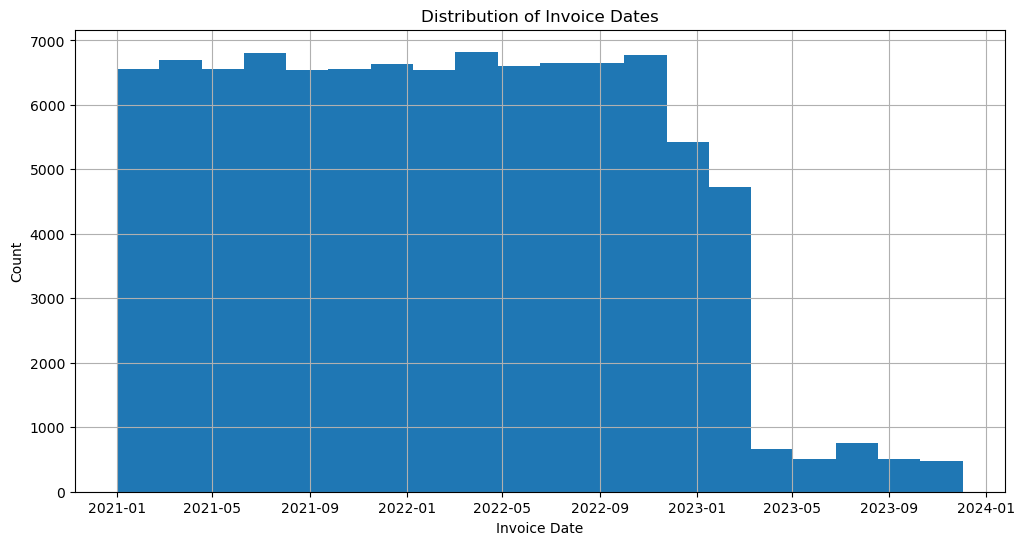

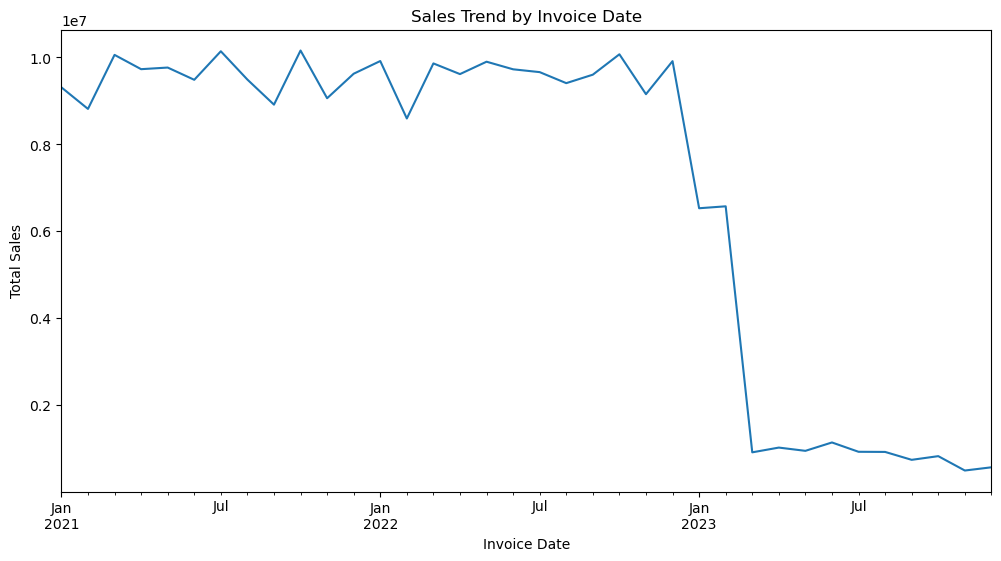

In [79]:
# Medium 3
# What are the total sales attributed to customers over the age of 45?

dataframe1["sales"]= dataframe1["quantity"] * dataframe1["price"]
dataframe1['invoice_date'] = pd.to_datetime(dataframe1['invoice_date'])

# Histogram for the Distribution of Invoice Dates
plt.figure(figsize=(12, 6))
dataframe1['invoice_date'].hist(bins=20)
plt.title('Distribution of Invoice Dates')
plt.xlabel('Invoice Date')
plt.ylabel('Count')
plt.show()

# Line Bar for Sales Trend Over Time
plt.figure(figsize=(12, 6))
dataframe1.groupby(pd.Grouper(key='invoice_date', freq='M'))["sales"].sum().plot(kind='line')
plt.title('Sales Trend by Invoice Date')
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales')
plt.show()

age_range        0-9       10-19        20-29        30-39        40-49  \
category                                                                  
Books            0.0    19891.95     80128.35     84446.10     82946.25   
Clothing         0.0  3029007.52  10079987.28  11516170.16  10933114.72   
Cosmetics        0.0   178009.48    594733.82    722406.22    656740.32   
Food & Beverage  0.0    20433.61     74271.23     89187.19     85034.57   
Shoes            0.0  1367187.26   6152942.84   7178633.37   6775319.13   
Souvenir         0.0    20128.68     53570.91     63705.63     65007.66   
Technology       0.0  1772400.00   5049450.00   6231750.00   5840100.00   
Toys             0.0    98273.28    380011.52    426460.16    378864.64   

age_range              50-59        60-69       70-79       80-89  90-99  
category                                                                  
Books               79537.50     76234.80    56251.95    21103.95    0.0  
Clothing         1081968

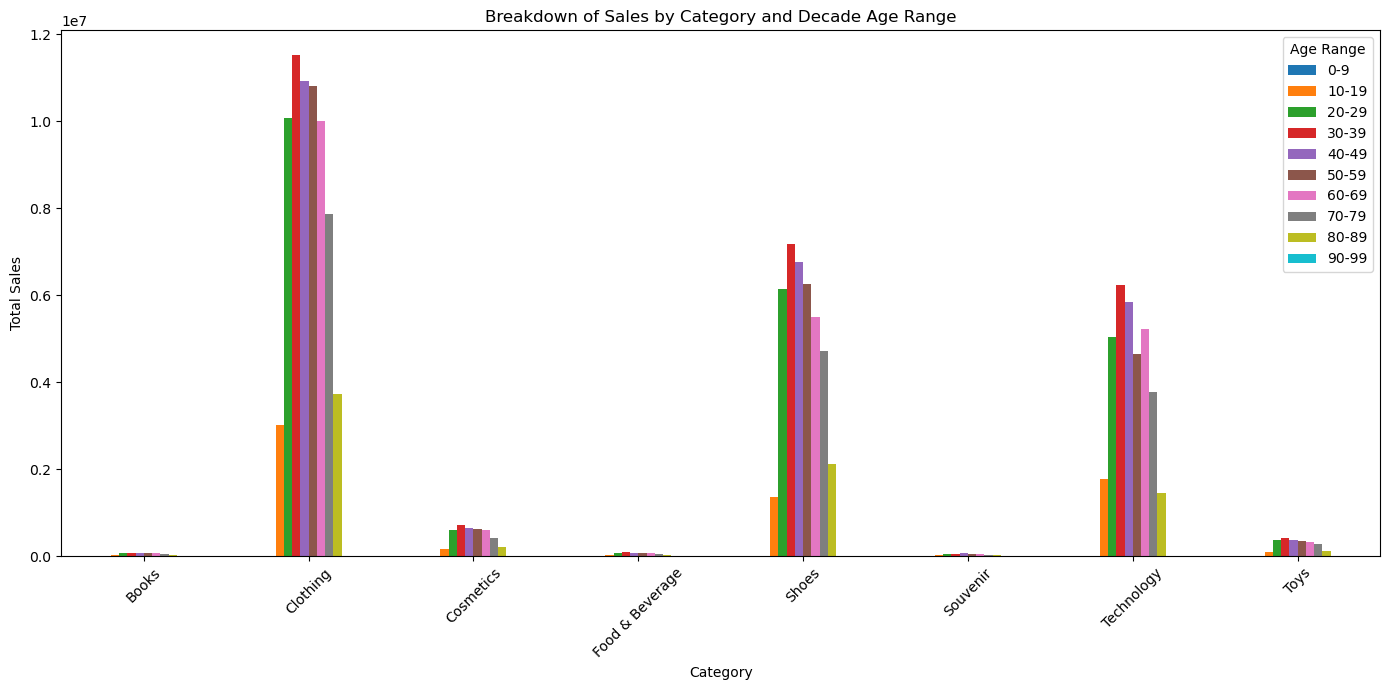

In [99]:
# Hard
# Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

import matplotlib.pyplot as plt 
merged_df = pd.merge(dataframe1, dataframe2, left_on='customer_id', right_on='id')

merged_df['age_range'] = pd.cut(merged_df['age'], bins=range(0, 101, 10), labels=[f"{i}-{i+9}" for i in range(0, 91, 10)])

pivot_table = merged_df.pivot_table(index='category', columns='age_range', values='sales', aggfunc='sum')

print(pivot_table)

pivot_table.plot(kind='bar', figsize=(14, 7))
plt. xlabel ('Category') 
plt. ylabel ('Total Sales')
plt.title( "Breakdown of Sales by Category and Decade Age Range")
plt.xticks(rotation=45)
plt. legend(title='Age Range')
plt. tight_layout()
plt.show()